# Modeling prior predictive distribution

In [130]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [192]:
# 1. 
# 2.
# 3.
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [193]:
# 4.
# 5.
samples = gen_quant.sample(data={"N":50}, fixed_param=True, iter_sampling=1000, iter_warmup=0, chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [194]:
df = samples.draws_pd()
df

,lp__,accept_stat__,y,p
0,0.0,0.0,10.0,0.188414
1,0.0,0.0,5.0,0.073468
2,0.0,0.0,6.0,0.128194
3,0.0,0.0,18.0,0.250675
4,0.0,0.0,6.0,0.188527
...,...,...,...,...
995,0.0,0.0,12.0,0.233919
996,0.0,0.0,5.0,0.129903
997,0.0,0.0,11.0,0.143608
998,0.0,0.0,12.0,0.247158


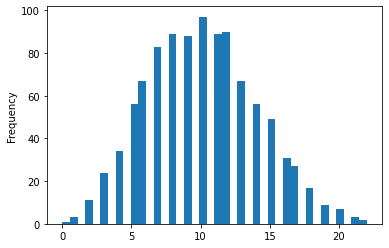

In [195]:
df['y'].plot.hist(bins=40)
plt.show()

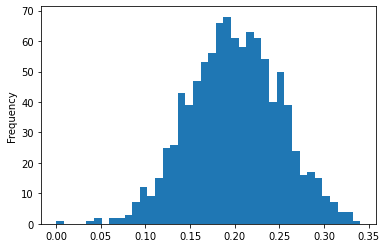

In [196]:
df['p'].plot.hist(bins=40)
plt.show()


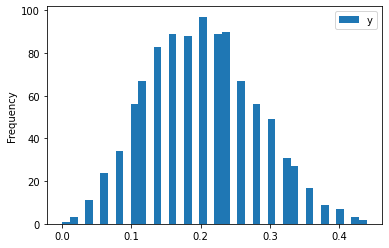

In [197]:
# 6.
ratio = pd.DataFrame(df['y'] / 50)
ratio.plot.hist(bins=40)
plt.show()

In [198]:
# 7.
ratio.mean()

y    0.20196
dtype: float64

Mean of the ratio is consistent with prior knowledge because it indicates that an allergic reaction occurs in about 20% of cases
<br> <br>

# Modeling posterior and posterior predictive distribution

In [213]:
# 1.
# 2.
gen_quant = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [201]:
# 3.
samples = gen_quant.sample(data={"N":50, "y":7})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [202]:
df = samples.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-23.6465,1.000000,0.893924,1.0,1.0,0.0,24.0042,0.235782,16.0
1,-22.5333,0.923037,0.893924,2.0,3.0,0.0,24.2081,0.174916,9.0
2,-22.5634,0.997052,0.893924,2.0,3.0,0.0,22.5639,0.188125,8.0
3,-23.1509,0.790631,0.893924,2.0,3.0,0.0,24.0623,0.220901,4.0
4,-22.6383,0.921897,0.893924,1.0,3.0,0.0,23.5691,0.161051,10.0
...,...,...,...,...,...,...,...,...,...
3995,-23.3134,1.000000,0.790700,1.0,1.0,0.0,23.7741,0.226263,13.0
3996,-23.1385,1.000000,0.790700,1.0,1.0,0.0,23.3739,0.220468,7.0
3997,-22.7697,1.000000,0.790700,1.0,1.0,0.0,23.0547,0.204589,11.0
3998,-22.6521,1.000000,0.790700,1.0,1.0,0.0,22.7491,0.197018,7.0


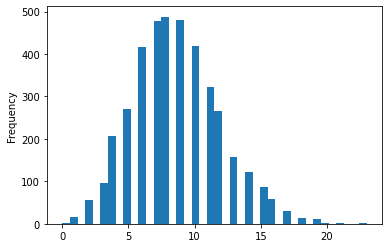

In [203]:
df['y_pred'].plot.hist(bins=40)
plt.show()

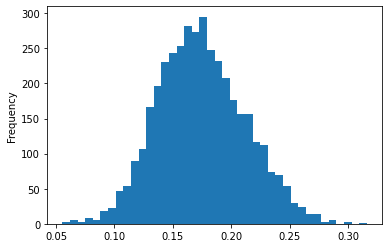

In [204]:
df['p'].plot.hist(bins=40)
plt.show()

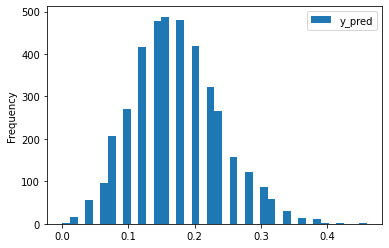

In [205]:
# 3.
ratio = pd.DataFrame(df['y_pred'] / 50)
ratio.plot.hist(bins=40)
plt.show()

In [206]:
ratio.mean()

y_pred    0.173135
dtype: float64

/usr/local/lib/python3.9/site-packages/arviz/data/base.py:220: UserWarning: More chains (4000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


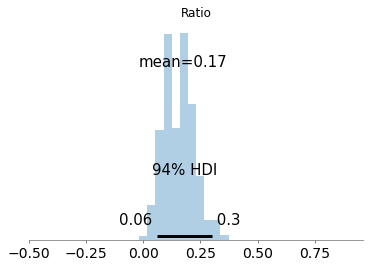

In [207]:
# 4.
ratio = ratio.to_numpy()
az.plot_posterior(ratio, kind='hist', hdi_prob=0.94, point_estimate='mean')
plt.title("Ratio")
plt.show()

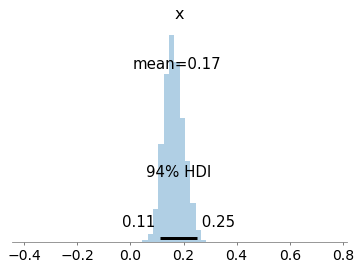

In [208]:
p = df['p'].to_numpy()
az.plot_posterior(p, kind='hist', hdi_prob=0.94, point_estimate='mean')
plt.show()

In [211]:
ratio_mean = np.mean(ratio)
ratio_hdi = az.hdi(ratio, hdi_prob=0.94)
p_mean = np.mean(p)
p_hdi = az.hdi(p, hdi_prob=0.94)

print("Ratio:")
print("Mean: ", ratio_mean, "  94% HDI: ", ratio_hdi)

print("\np:")
print("Mean: ", p_mean, "  94% HDI: ", p_hdi)
print("\n")

Ratio:
Mean:  0.173135   94% HDI:  [[0.06 0.3 ]]

p:
Mean:  0.17433060757500002   94% HDI:  [0.111277 0.249523]




/tmp/ipykernel_417/3731869898.py:2: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ratio_hdi = az.hdi(ratio, hdi_prob=0.94)


In [212]:
# 5. 
ratio_lower_then_avg = np.mean(ratio < 0.2)

print("Probability that ratio is lower than the average probability from traditional vaccines: ", ratio_lower_then_avg)

Probability that ratio is lower than the average probability from traditional vaccines:  0.6275
